<a href="https://colab.research.google.com/github/SainavyaGadde/DataScienceFinalProject/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings("ignore")


##Data Preprocessing


In [3]:
#save the csv file in google drive location
file_name = '/content/sample_data/household_power_consumption.csv'

# Load the dataset into a Pandas DataFrame.
df = pd.read_csv(file_name, na_values = ['nan','?'])

In [4]:
# check the sample
df.sample(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
602572,8/2/2008,4:16:00,0.304,0.070,243.29,1.2,0.0,0.0,0.0
574690,19/1/2008,19:34:00,2.794,0.116,238.33,11.8,0.0,0.0,18.0
716193,27/4/2008,1:57:00,0.620,0.000,242.07,2.6,0.0,0.0,1.0
88240,16/2/2007,0:04:00,1.616,0.112,242.92,6.6,0.0,0.0,18.0


In [5]:
# check size of data
df.shape

(1048575, 9)

In [6]:
# check data types
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [7]:
# check na
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,4069
Global_reactive_power,4069
Voltage,4069
Global_intensity,4069
Sub_metering_1,4069
Sub_metering_2,4069
Sub_metering_3,4069


In [8]:
# percentage of na
df.isna().sum()/df.shape[0]

,0
Date,0.000000
Time,0.000000
Global_active_power,0.003881
Global_reactive_power,0.003881
Voltage,0.003881
Global_intensity,0.003881
Sub_metering_1,0.003881
Sub_metering_2,0.003881
Sub_metering_3,0.003881


In [9]:
# check the na values
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1043669,10/12/2008,11:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043670,10/12/2008,11:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043671,10/12/2008,11:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043672,10/12/2008,11:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# drop all nans
df.dropna(inplace=True)

In [11]:
# check if there are other nas
df.isna().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,False


In [12]:
# check data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044506 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1044506 non-null  object 
 1   Time                   1044506 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 79.7+ MB


In [13]:
# check data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1044506.0,1.108202,1.129546,0.076,0.288,0.550,1.544,10.67
Global_reactive_power,1044506.0,0.118273,0.109506,0.000,0.000,0.098,0.186,1.39
Voltage,1044506.0,239.959803,3.284504,223.490,237.970,240.210,242.140,252.14
Global_intensity,1044506.0,4.718123,4.763588,0.200,1.200,2.400,6.400,46.40
Sub_metering_1,1044506.0,1.177451,6.321183,0.000,0.000,0.000,0.000,80.00
Sub_metering_2,1044506.0,1.475177,6.352703,0.000,0.000,0.000,1.000,78.00
Sub_metering_3,1044506.0,5.933837,8.210398,0.000,0.000,0.000,17.000,31.00


In [14]:
# Convert Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format="%d/%m/%Y %H:%M:%S")


In [15]:
# Drop the date and Time column since we can get them on column created
df.drop(columns=["Date", "Time"], inplace=True)


##Feature Engineering

In [16]:
# create some additional data
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofyear"] = df["datetime"].dt.dayofyear
df["dayname"] = df["datetime"].dt.day_name()


In [17]:
# for the purpose of analysis, create year-month column from datetime
df["year_month"] = df["datetime"].dt.strftime("%Y-%b")

In [18]:
# check sample
df.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
807564,0.418,0.000,240.22,2.0,1.0,0.0,0.0,2008-06-29 12:48:00,6,2008,29,12,181,Sunday,2008-Jun
185067,0.184,0.000,236.41,1.0,0.0,0.0,0.0,2007-04-24 05:51:00,4,2007,24,5,114,Tuesday,2007-Apr
599985,1.420,0.062,228.42,6.2,1.0,0.0,16.0,2008-02-06 09:09:00,2,2008,6,9,37,Wednesday,2008-Feb
285802,0.192,0.000,240.28,1.0,0.0,0.0,0.0,2007-07-03 04:46:00,7,2007,3,4,184,Tuesday,2007-Jul


##Exploratory Data Analysis (EDA)


In [19]:
# check the max between date ranges to obrserve when it starts and ends
df["datetime"].min(), df["datetime"].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2008-12-13 21:38:00'))

In [20]:
data = df.copy()

data = data.sort_values(by="year_month").reset_index(drop=True)


In [21]:
# data
def plot_monthly_data(meaned_data, title, color, col, subplot_position):
    plt.subplot(subplot_position)
    meaned_data.index = pd.to_datetime(meaned_data.index, format='%Y-%b')
    meaned_data_sorted = meaned_data.sort_index()
    meaned_data_sorted.index = meaned_data_sorted.index.strftime('%Y-%b')
    meaned_data_sorted.plot(kind='line', color=color, marker='o')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=range(len(meaned_data_sorted)), labels=meaned_data_sorted.index, rotation=45, fontsize=10)


## Monthly *Trends*

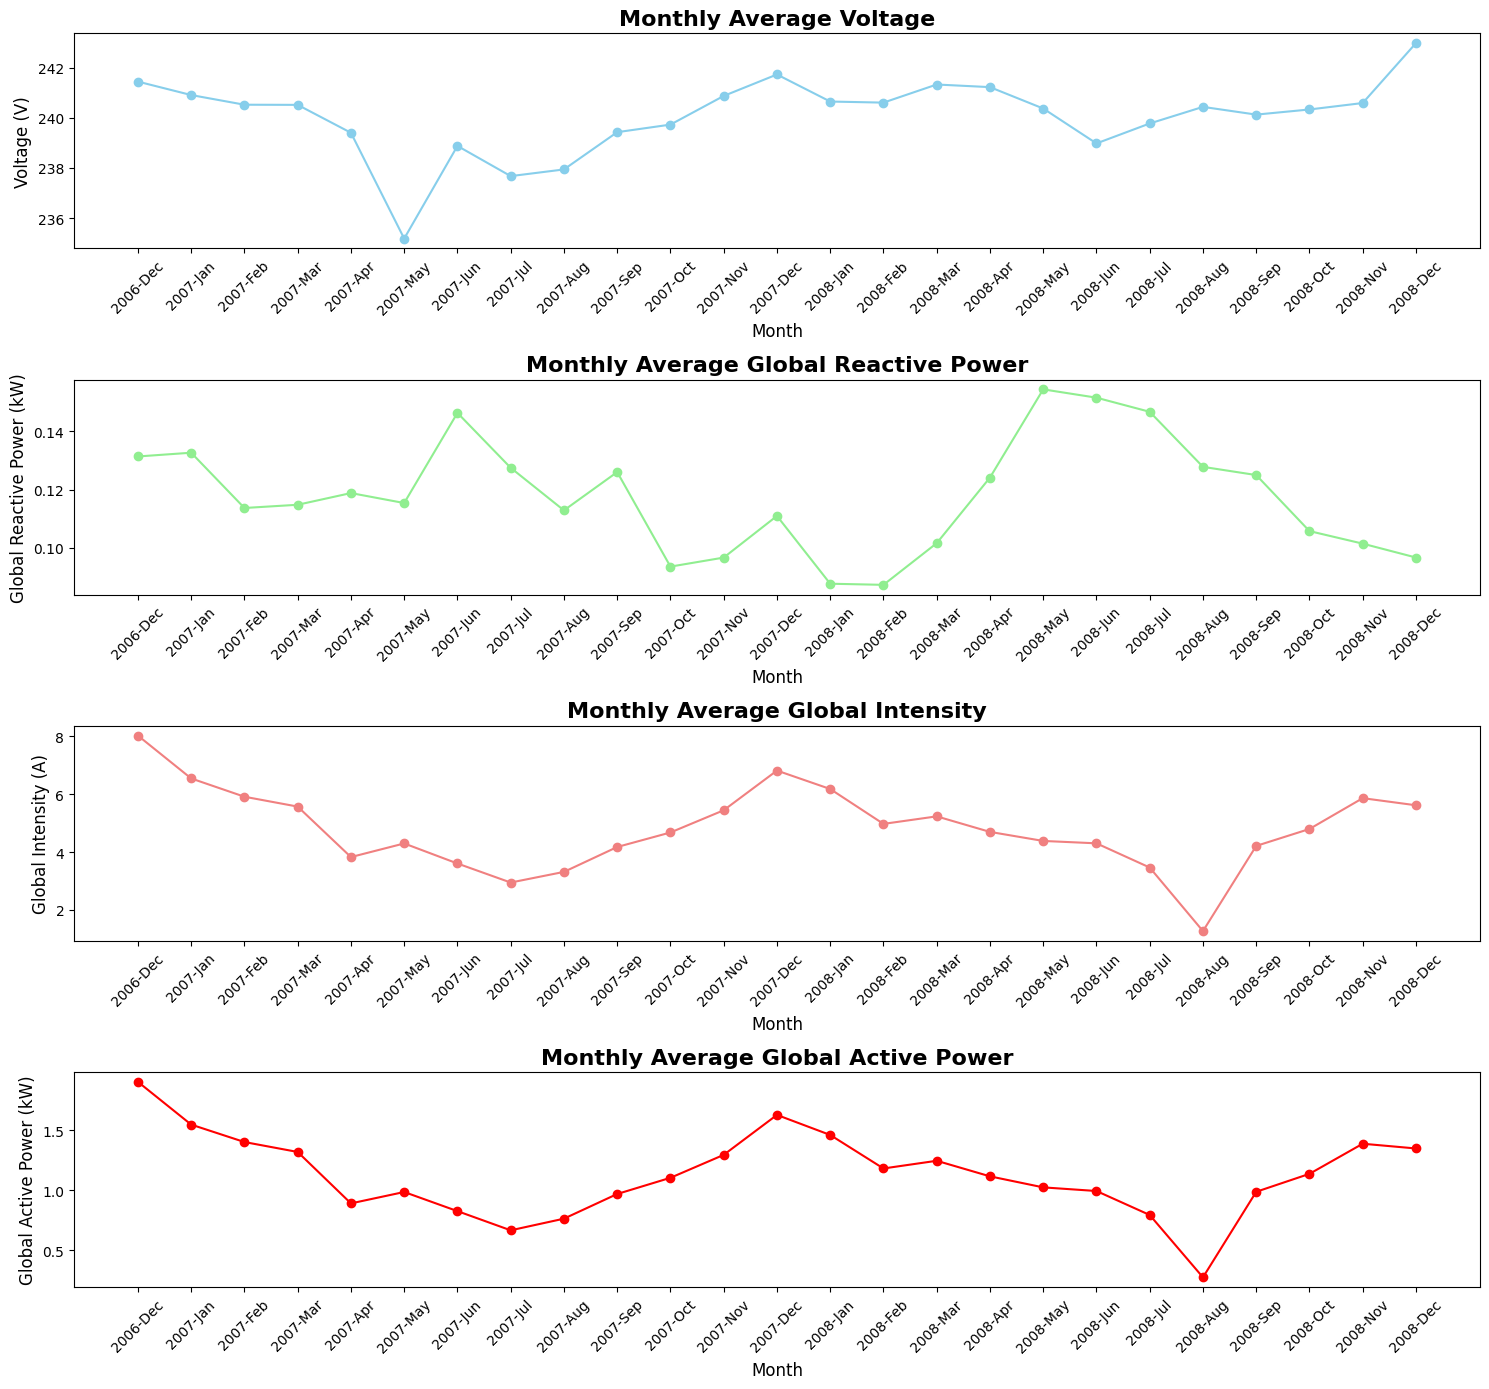

In [22]:
# lets plot AIR Information: VOltage, Active Power, Reactive Power, Intensity for monthly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 14))
monthly_voltage = data.groupby('year_month')['Voltage'].mean()
plot_monthly_data(
    meaned_data=monthly_voltage,
    col='Voltage (V)',
    title='Monthly Average Voltage',
    color='skyblue',
    subplot_position=411
)

# Plot Global Reactive Power
monthly_reactive_power = data.groupby('year_month')['Global_reactive_power'].mean()
plot_monthly_data(
    meaned_data=monthly_reactive_power,
    col='Global Reactive Power (kW)',
    title='Monthly Average Global Reactive Power',
    color='lightgreen',
    subplot_position=412
)


# Plot Global Intensity
monthly_intensity = data.groupby('year_month')['Global_intensity'].mean()
plot_monthly_data(
    meaned_data=monthly_intensity,
    col='Global Intensity (A)',
    title='Monthly Average Global Intensity',
    color='lightcoral',
    subplot_position=413
)

# Plot Global Active Power
monthly_active_power = data.groupby('year_month')['Global_active_power'].mean()
plot_monthly_data(
    meaned_data=monthly_active_power,
    col='Global Active Power (kW)',
    title='Monthly Average Global Active Power',
    color='red',
    subplot_position=414
)

plt.tight_layout()
plt.show()

## Monthly *Trends*

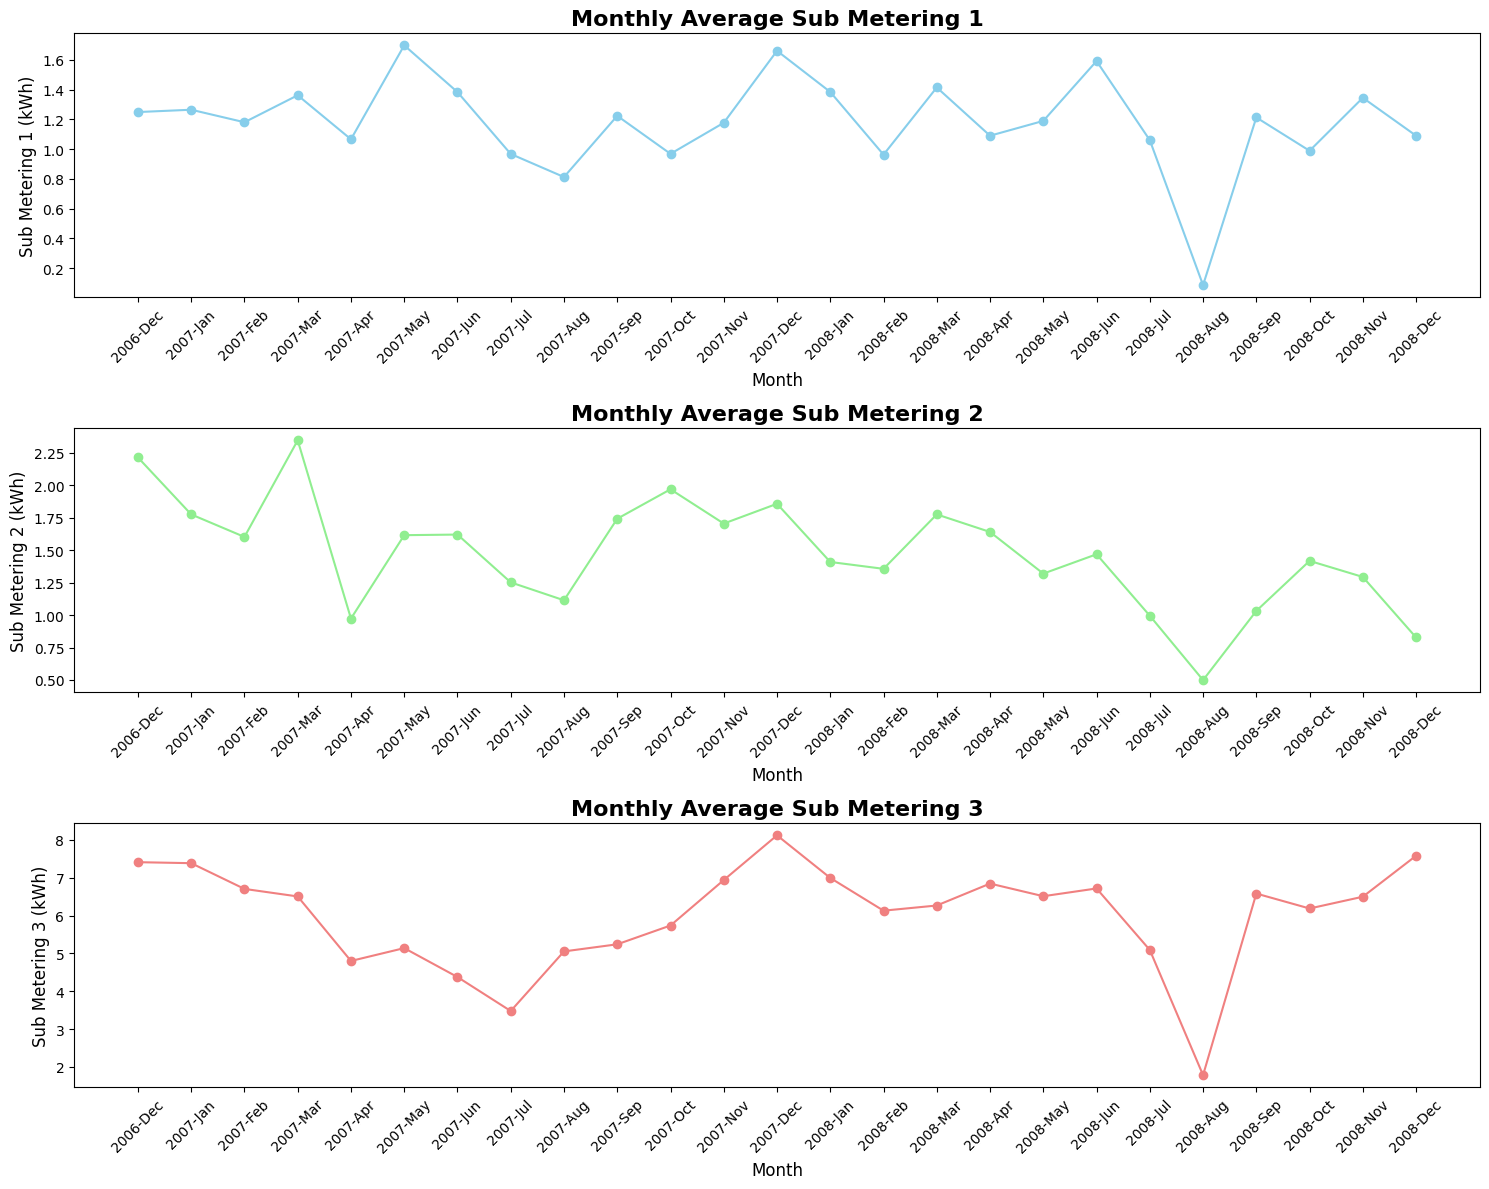

In [23]:
# do the same for SUB METERS
plt.figure(figsize=(15, 12))

# Sub_metering_1
Sub_metering_1 = data.groupby('year_month')['Sub_metering_1'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_1,
    col='Sub Metering 1 (kWh)',
    title='Monthly Average Sub Metering 1',
    color='skyblue',
    subplot_position=311
)

# Sub_metering_2
Sub_metering_2 = data.groupby('year_month')['Sub_metering_2'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_2,
    col='Sub Metering 2 (kWh)',
    title='Monthly Average Sub Metering 2',
    color='lightgreen',
    subplot_position=312
)

# Sub_metering_3
Sub_metering_3 = data.groupby('year_month')['Sub_metering_3'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_3,
    col='Sub Metering 3 (kWh)',
    title='Monthly Average Sub Metering 3',
    color='lightcoral',
    subplot_position=313
)
plt.tight_layout()
plt.show()


## Hourly *Trends*

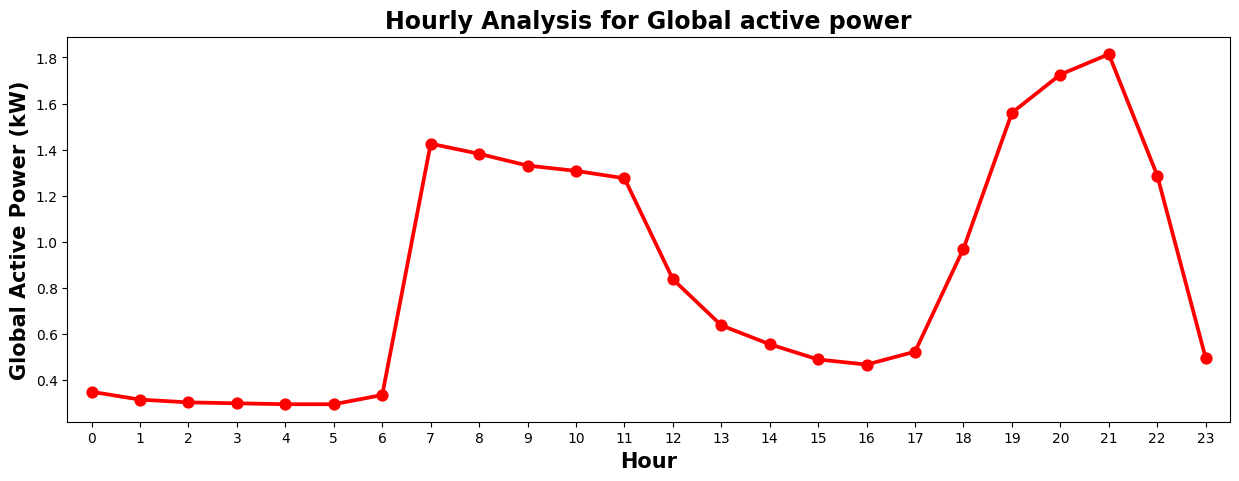

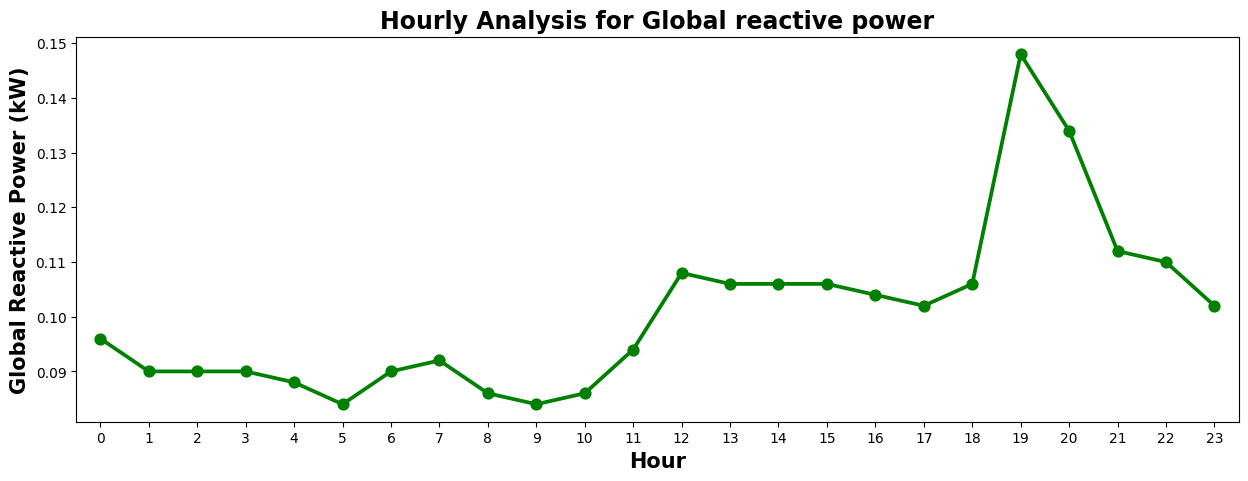

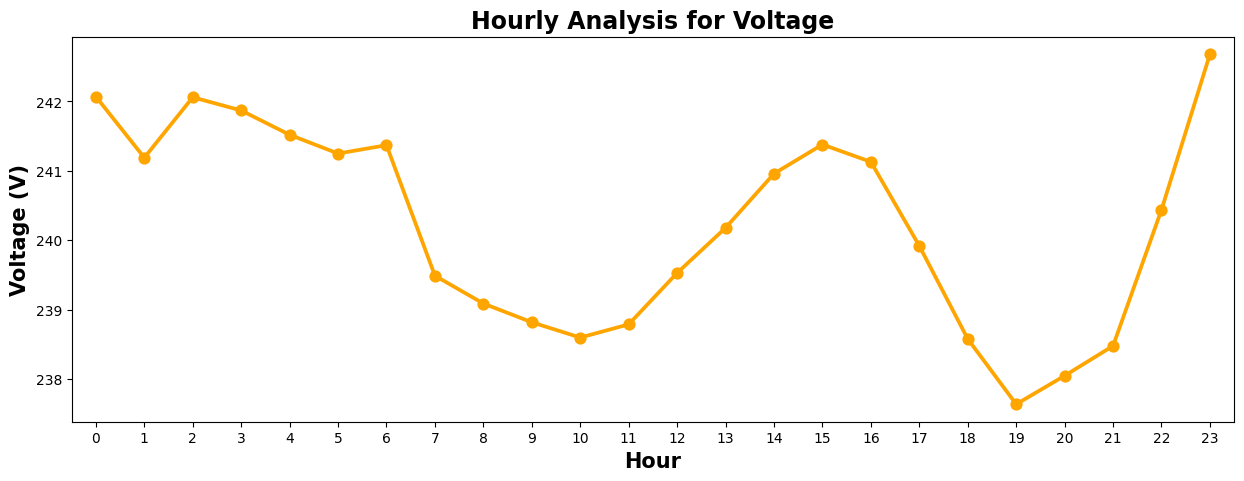

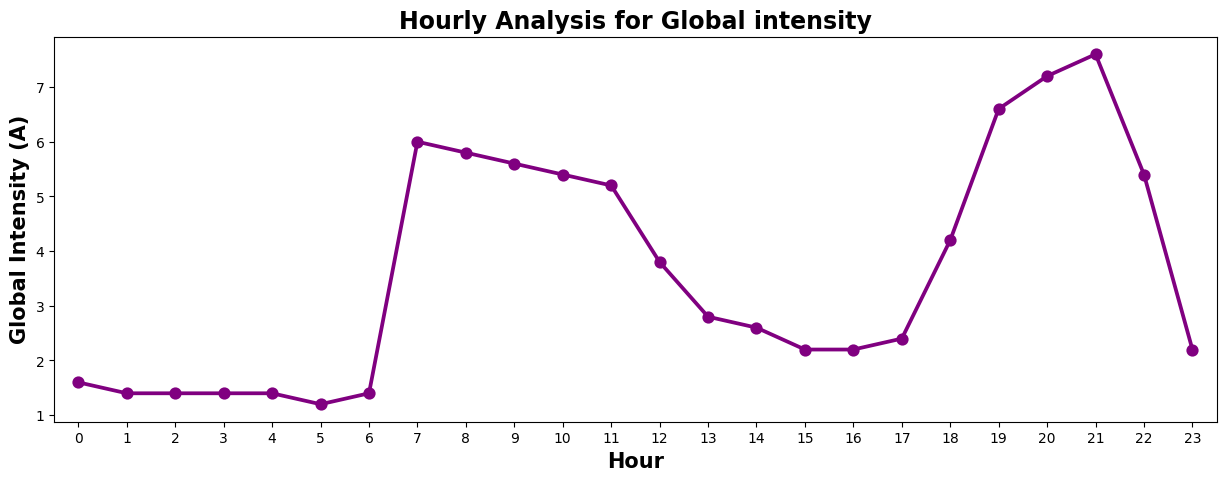

In [24]:
# do hour analysis of the energies
import seaborn as sns

colors = ['red', 'green', 'orange', 'purple', 'yellow', 'blue', 'cyan', 'magenta', 'gray', 'brown']
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
y_labels = [
    'Global Active Power (kW)',
    'Global Reactive Power (kW)',
    'Voltage (V)',
    'Global Intensity (A)'
]

# create plots by medianed hour
for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=False)
    )
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )

    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


## Hourly *Trends*

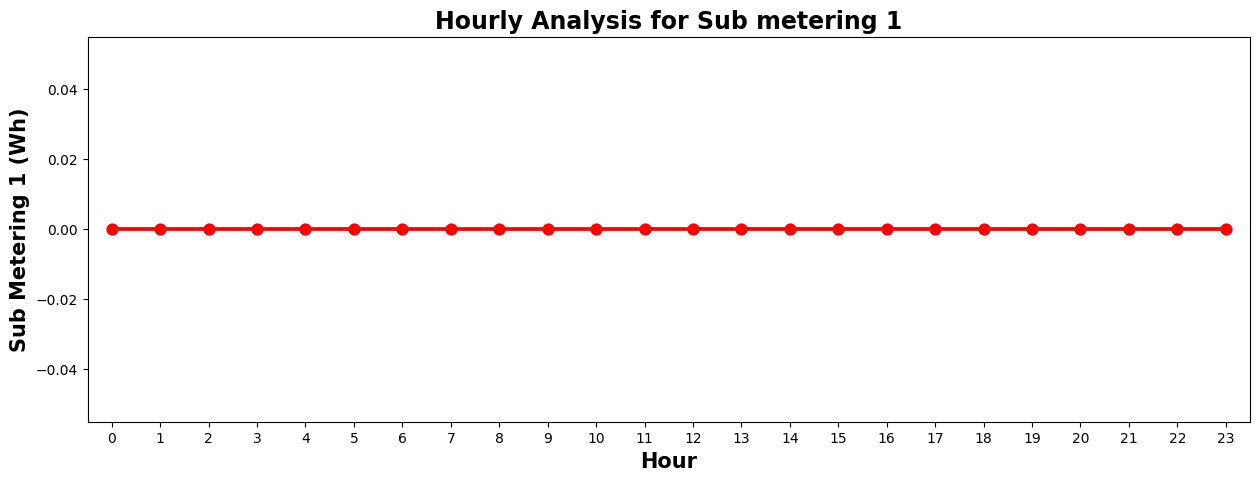

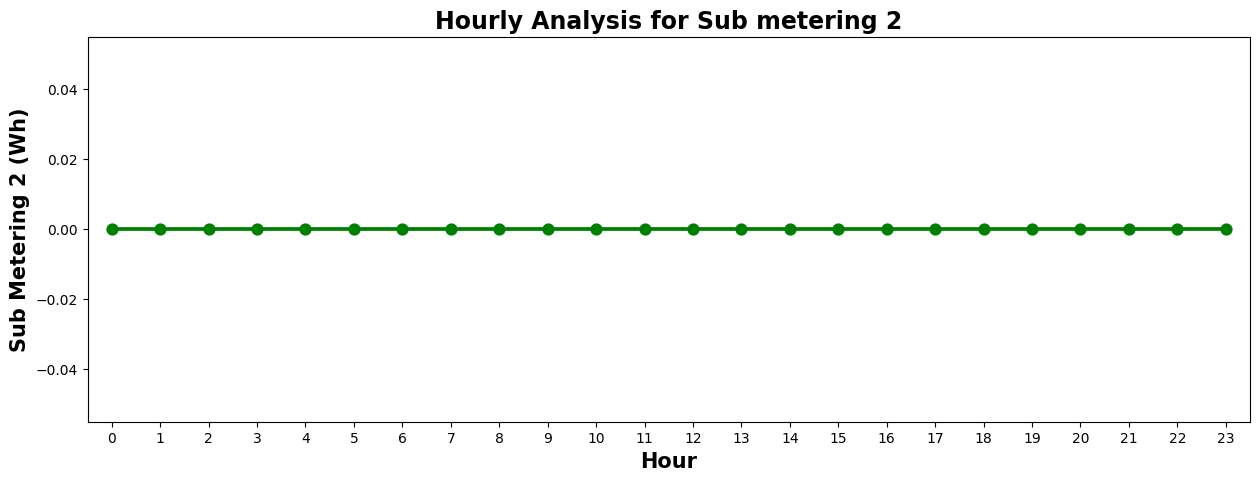

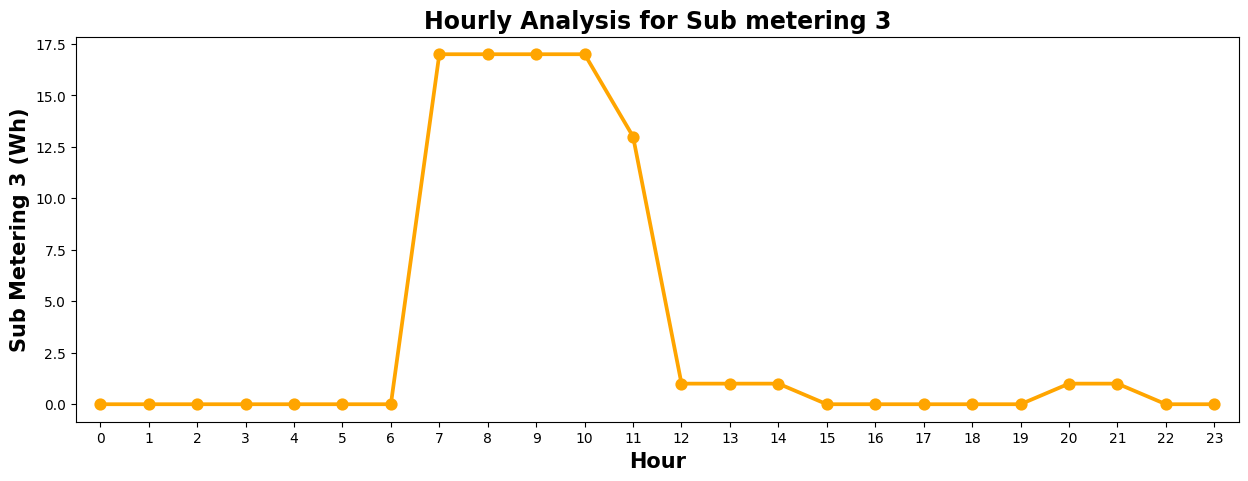

In [25]:
# BY sub meters
# cols for analysis (Sub_metering_1, Sub_metering_2, Sub_metering_3)
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

y_labels = [
    'Sub Metering 1 (Wh)',
    'Sub Metering 2 (Wh)',
    'Sub Metering 3 (Wh)'
]

for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=True)
    )

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )
    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


In [26]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime', 'month', 'year', 'day', 'hour',
       'dayofyear', 'dayname', 'year_month'],
      dtype='object')

## Day of Week *Trends*

In [27]:
# create the order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


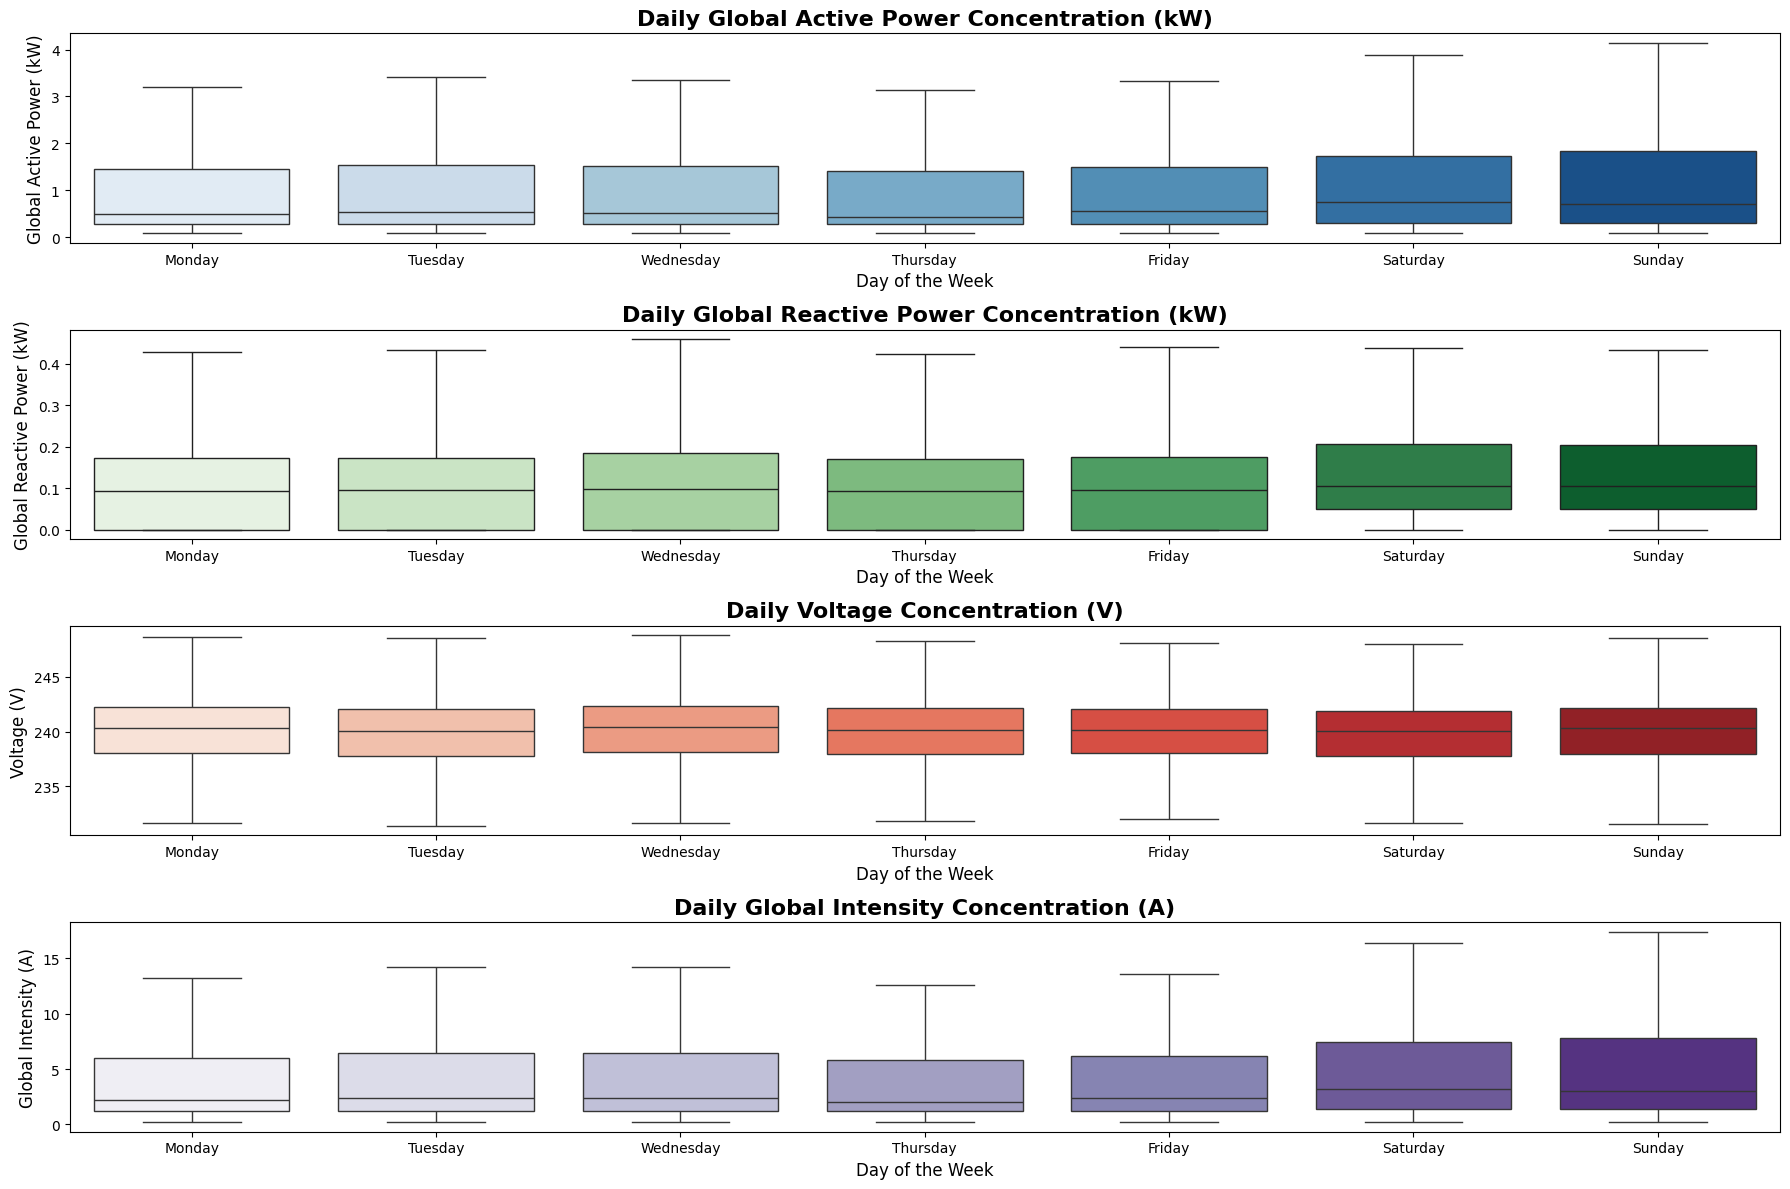

In [28]:
plt.figure(figsize=(18, 12))

# Global Active Power plot
plt.subplot(4, 1, 1)
sns.boxplot(x='dayname', y='Global_active_power', data=data, palette='Blues', showfliers=False, order=weekday_order)
plt.title('Daily Global Active Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)

# Global Reactive Power plot
plt.subplot(4, 1, 2)
sns.boxplot(x='dayname', y='Global_reactive_power', data=data, palette='Greens', showfliers=False, order=weekday_order)
plt.title('Daily Global Reactive Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Reactive Power (kW)', fontsize=12)

# Voltage plot
plt.subplot(4, 1, 3)
sns.boxplot(x='dayname', y='Voltage', data=data, palette='Reds', showfliers=False, order=weekday_order)
plt.title('Daily Voltage Concentration (V)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)

# Global Intensity plot
plt.subplot(4, 1, 4)
sns.boxplot(x='dayname', y='Global_intensity', data=data, palette='Purples', showfliers=False, order=weekday_order)
plt.title('Daily Global Intensity Concentration (A)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Intensity (A)', fontsize=12)

plt.tight_layout()
plt.show()


## Daily Trends

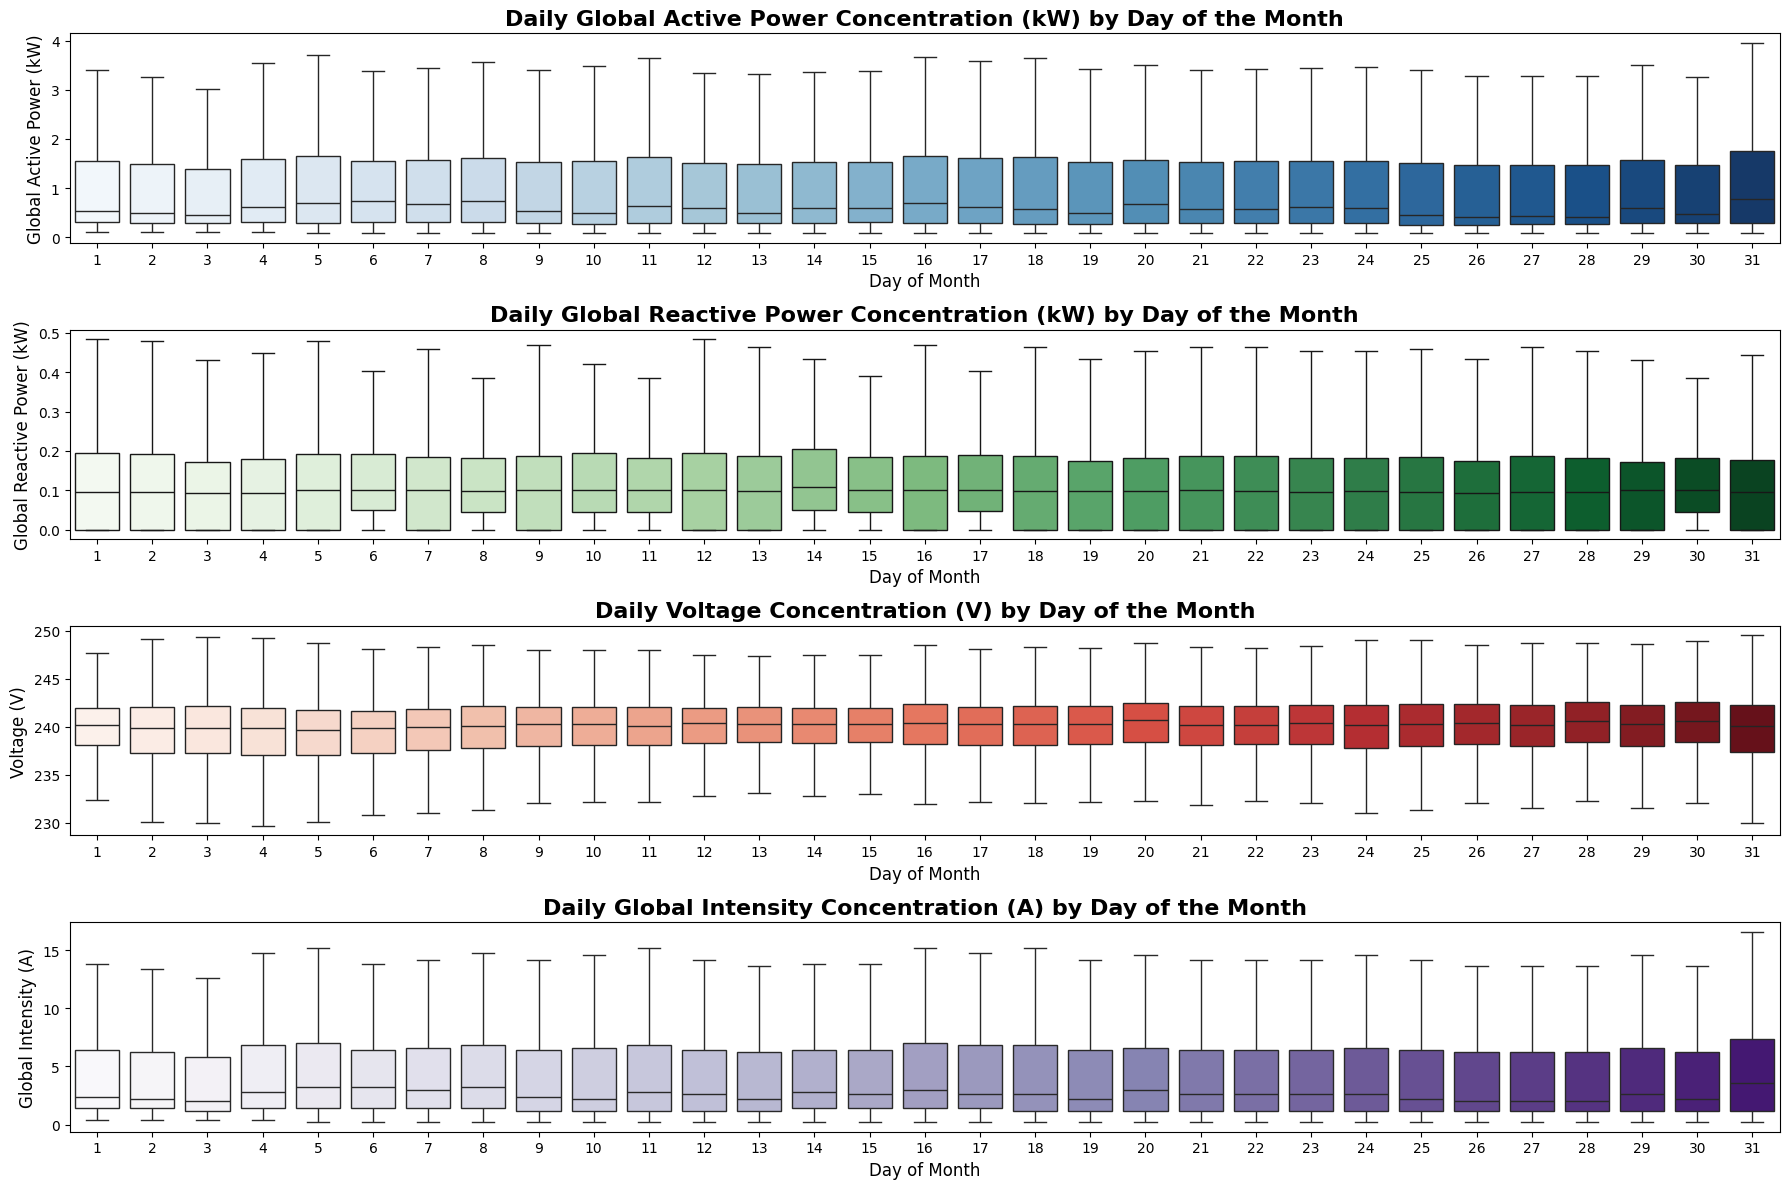

In [29]:
# grouping bu date of month
def plot_boxplot_by_group(data, group_col, y_col, title, palette, ylabel):
    sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()

# Boxplots for day of the month (day) - grouped by day of the month
plt.figure(figsize=(18, 12))
plt.subplot(4, 1, 1)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_active_power',
    title='Daily Global Active Power Concentration (kW) by Day of the Month',
    palette='Blues',
    ylabel='Global Active Power (kW)'
)
plt.subplot(4, 1, 2)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_reactive_power',
    title='Daily Global Reactive Power Concentration (kW) by Day of the Month',
    palette='Greens',
    ylabel='Global Reactive Power (kW)'
)
plt.subplot(4, 1, 3)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Voltage',
    title='Daily Voltage Concentration (V) by Day of the Month',
    palette='Reds',
    ylabel='Voltage (V)'
)
plt.subplot(4, 1, 4)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_intensity',
    title='Daily Global Intensity Concentration (A) by Day of the Month',
    palette='Purples',
    ylabel='Global Intensity (A)'
)

plt.tight_layout()
plt.show()

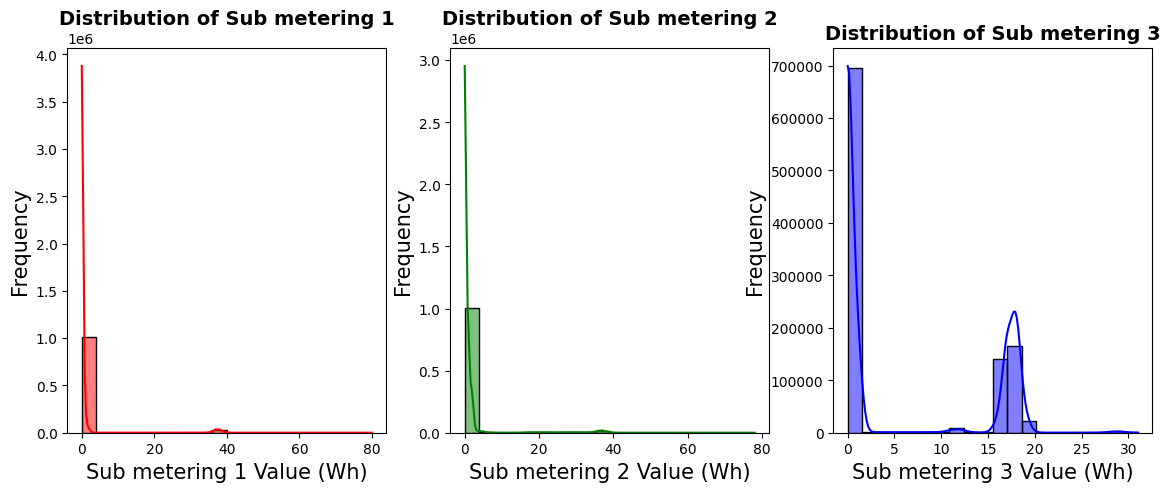

In [30]:
# distribution of submetering usages
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 5))
# for each sub meters
for i, column in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data[column], kde=True, color=colors[i % len(colors)], bins=20)

    plt.title(f'Distribution of {column.replace("_", " ").capitalize()}', fontweight='bold', fontsize=14)
    plt.xlabel(f'{column.replace("_", " ").capitalize()} Value (Wh)', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
plt.show()

In [31]:
# select numerical columns
# We exlude the TIME BASED VARIABLES
df_num = df.select_dtypes(include=["float", "int"]).drop(columns=["year", "dayofyear","month"])
df_num.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,17


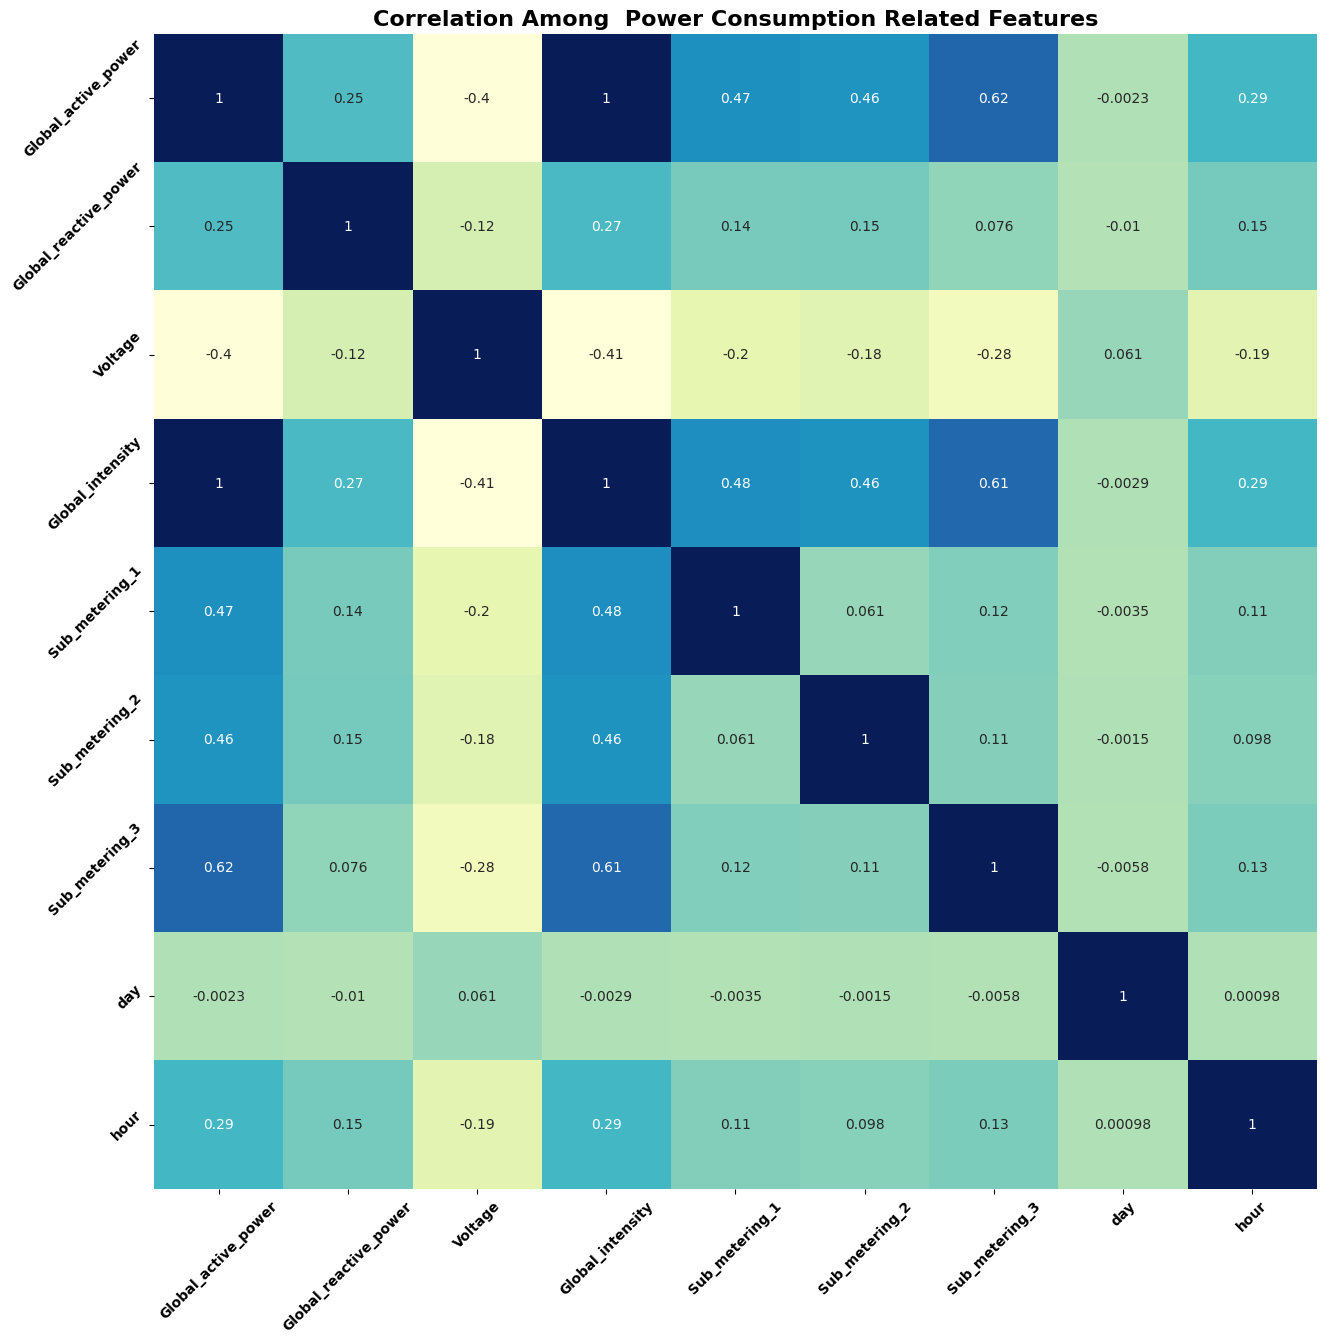

In [32]:
# plot corrrelation analysis
plt.figure(figsize=(15,15))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Correlation Among  Power Consumption Related Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=45, fontweight='bold')
plt.show()

In [33]:
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
Global_active_power,1.000000,0.254841,-0.400987,0.999020,0.474129,0.456677,0.624107,-0.002291,0.285043
Global_reactive_power,0.254841,1.000000,-0.120617,0.271843,0.137682,0.150528,0.076274,-0.010067,0.146362
Voltage,-0.400987,-0.120617,1.000000,-0.411298,-0.203805,-0.178899,-0.284932,0.060809,-0.190201
Global_intensity,0.999020,0.271843,-0.411298,1.000000,0.478198,0.462192,0.613220,-0.002902,0.285852
Sub_metering_1,0.474129,0.137682,-0.203805,0.478198,1.000000,0.060830,0.115600,-0.003514,0.110560
Sub_metering_2,0.456677,0.150528,-0.178899,0.462192,0.060830,1.000000,0.106461,-0.001452,0.097508
Sub_metering_3,0.624107,0.076274,-0.284932,0.613220,0.115600,0.106461,1.000000,-0.005774,0.127895
day,-0.002291,-0.010067,0.060809,-0.002902,-0.003514,-0.001452,-0.005774,1.000000,0.000984
hour,0.285043,0.146362,-0.190201,0.285852,0.110560,0.097508,0.127895,0.000984,1.000000


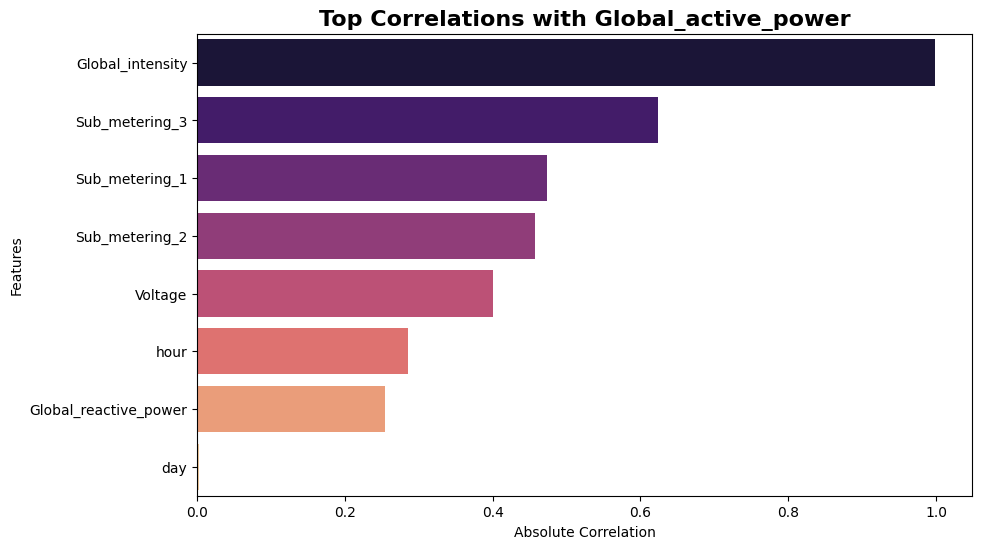

In [34]:
# get correlation with Global_active_power

# extract the Global_active_power column and sort the correlations
Global_active_power = corr['Global_active_power'].abs().sort_values(ascending=False)
# remove the first since is stroke itself
top_corr = Global_active_power.index[1:]

# a bar chart show the results
plt.figure(figsize=(10, 6))
sns.barplot(x=Global_active_power[top_corr], y=top_corr, palette='magma')
plt.title('Top Correlations with Global_active_power', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')

plt.show()

## MACHINE LEARNING

In [35]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,12,2006,16,17,350,Saturday,2006-Dec
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,12,2006,16,17,350,Saturday,2006-Dec
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,12,2006,16,17,350,Saturday,2006-Dec
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,12,2006,16,17,350,Saturday,2006-Dec
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,12,2006,16,17,350,Saturday,2006-Dec


A breakdown of the fields in relation to your objectives and recommendations for refinement:

1. **Selected Features:**
   - **Global_reactive_power**: it has reactive power in the electrical system.
   - **Voltage**: Variations in voltage can affect power usage and appliance behavior, making it a relevant feature.
   - **Global_intensity**: it represents the current intensity in the electrical system and directly correlates with energy consumption.
   - **Sub_metering_1, Sub_metering_2, Sub_metering_3**: Sub-metering data provides granular insights into energy usage by different parts of the household, such as kitchen, laundry, etc.
   - **day**: The day of the week can capture periodic patterns (i.e, weekends vs. weekdays).
   - **hour**: The hour of the day captures diurnal patterns, such as peak usage during mornings and evenings.

2. **Target Variable:**
   - **Global_active_power**: Represents the total active power consumed by the household.

---


In [36]:
# we select only the columns above since they seems to have information about global power
COLUMNS = [
    'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3', 'day', 'hour'
]

TARGET = "Global_active_power"

In [37]:
# unique dates.
df["datetime"] = df["datetime"].astype("str").str.split(" ").str.get(0)

In [38]:
df = df.groupby("datetime")[COLUMNS+[TARGET]].mean().reset_index(drop=True)
df.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour,Global_active_power
0,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,16.0,20.181818,3.053475
1,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,17.0,11.500000,2.354486
2,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,18.0,11.500000,1.530435
3,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,19.0,11.500000,1.157079
4,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972,20.0,11.500000,1.545658


In [39]:
df.shape

(728, 9)

In [40]:

# ftn to create time steps
def create_time_steps(data, target, time_steps):
    """
    converts the df into sequences for time-series prediction.

    :param data: DataFrame containing features.
    :param target: Series containing the target variable.
    :param time_steps: Number of previous time steps to consider for prediction.
    :return: X, y arrays suitable for time-series modeling.
    """
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps].values)
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

In [41]:
# define paramss
TIME_STEPS = 7
BATCH_SIZE = 32
EPOCHS = 20
HIDDEN_SIZE = 128
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


<Axes: xlabel='Global_active_power', ylabel='Density'>

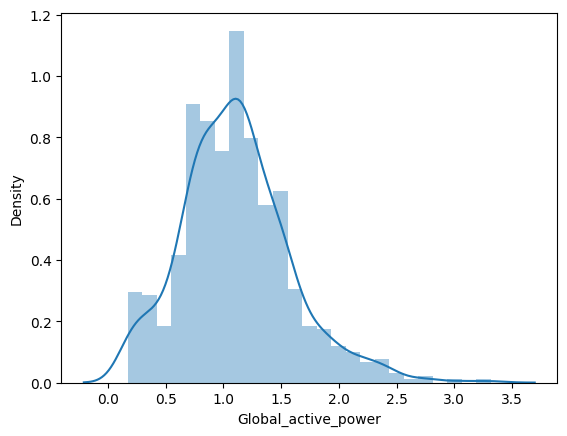

In [42]:
# check how the target distribution is
sns.distplot(df[TARGET])

<Axes: xlabel='Global_active_power', ylabel='Density'>

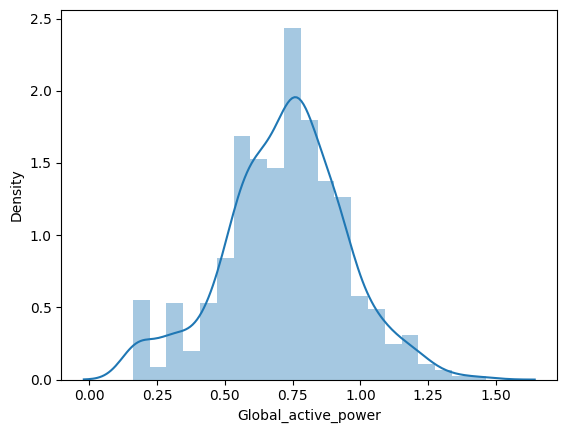

In [43]:
sns.distplot(np.log1p(df[TARGET]))

In [44]:
df.head(2)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour,Global_active_power
0,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,16.0,20.181818,3.053475
1,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,17.0,11.500000,2.354486


In [45]:
# data scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[COLUMNS])

target_converted = np.log1p(df[TARGET])
# convert back to for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=COLUMNS)


# create sequence data
X, y = create_time_steps(
    data=scaled_df[COLUMNS],
    target=target_converted,
    time_steps=TIME_STEPS
)


In [46]:
# check the shape
X.shape, y.shape

((721, 7, 8), (721,))

In [47]:
# split the data into training and testing sets
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
ytrain, ytest = y[:train_size], y[train_size:]

In [48]:
Xtrain[:3][:3][0]

array([[-9.58252531e-01, -1.83014195e+00,  4.22646963e+00,
        -1.04035974e+00, -6.08262780e-02,  2.60680038e+00,
         3.13462022e-02,  1.44933476e+01],
       [ 1.23143238e+00,  7.05987113e-02,  2.66699900e+00,
         2.09250676e-01,  9.21430160e-01,  1.33553764e+00,
         1.44878715e-01, -5.57004839e-03],
       [-1.88612217e-01,  6.36709660e-01,  8.57935929e-01,
        -3.86972688e-01,  2.22732989e-01,  1.52379141e+00,
         2.58411229e-01, -5.57004839e-03],
       [-4.28551855e-01,  1.01634593e+00,  1.01777488e-01,
        -5.24657259e-01,  2.44508970e+00, -6.50998405e-01,
         3.71943742e-01, -5.57004839e-03],
       [-2.06170933e-01,  1.16904257e+00,  8.81043502e-01,
        -1.04035974e+00,  2.34779492e-01,  1.53630458e+00,
         4.85476255e-01, -5.57004839e-03],
       [-5.73963921e-01,  5.42176185e-01,  1.56093486e-01,
         4.60297965e-02,  2.25252993e-01,  5.27601903e-01,
         5.99008769e-01, -4.40869068e-03],
       [ 3.66765116e-01,  6.133930

In [49]:
Xtest.shape, ytest.shape, Xtrain.shape, ytrain.shape

((145, 7, 8), (145,), (576, 7, 8), (576,))

In [50]:
# get the data as tensors
Xtrain_tensor = torch.tensor(Xtrain, dtype=torch.float32)
Ytrain_tensor = torch.tensor(ytrain, dtype=torch.float32).unsqueeze(1)
Xtest_tensor = torch.tensor(Xtest, dtype=torch.float32)
Ytest_tensor = torch.tensor(ytest, dtype=torch.float32).unsqueeze(1)

Xtrain_tensor.shape, Ytrain_tensor.shape

(torch.Size([576, 7, 8]), torch.Size([576, 1]))

In [51]:
from torch.utils.data import DataLoader, TensorDataset

# create data loader
train_dataset = TensorDataset(Xtrain_tensor, Ytrain_tensor)
test_dataset = TensorDataset(Xtest_tensor, Ytest_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [52]:
def rmse_score(y_true, y_pred):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [53]:
# function to train a model and evaluate
def train_and_evaluate(
    model, train_loader, test_loader, optimizer, criterion, epochs=10, device = DEVICE
):
    """
    Trains and evaluates a PyTorch model.

    Parameters:
    - model: The PyTorch model to train.
    - train_loader: DataLoader for the training set.
    - test_loader: DataLoader for the validation/test set.
    - optimizer: Optimizer to use during training.
    - criterion: Loss function.
    - epochs: Number of training epochs.
    - device: Device to train on ('cpu' or 'cuda').

    Returns:
    - trained_model: The trained model.
    - metrics: Dictionary containing train/validation losses, RMSE, and other metrics.
    """
    model = model.to(device)
    hist = {"train_loss":[], "train_rmse":[], "val_loss":[], "val_rmse":[]}
    for epoch in range(epochs):
        #do the train loop
        model.train()
        train_loss = 0.0
        train_preds = []
        train_actual = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            train_preds.extend(outputs.detach().numpy())
            train_actual.extend(y_batch.squeeze().detach().numpy())
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        rmse_train = rmse_score(train_actual, train_preds)

        # Validation loop
        model.eval()
        val_loss = 0.0
        all_outputs = []
        all_targets = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                all_outputs.append(outputs.cpu())
                all_targets.append(y_batch.cpu())
        val_loss /= len(test_loader)

        # get R² score for validation
        all_outputs = torch.cat(all_outputs).numpy()
        all_targets = torch.cat(all_targets).numpy()
        rmse_val = rmse_score(all_targets, all_outputs)

        hist['train_loss'].append(train_loss)
        hist['train_rmse'].append(rmse_train)
        hist['val_loss'].append(val_loss)
        hist['val_rmse'].append(rmse_val)

        print(f"Epoch {epoch + 1}/{epochs} Train Loss: {train_loss:.5f} Train rmse: {rmse_train:.5f}  Val Loss {val_loss:.5f}  val rmse {rmse_val:.5f}")


    return model, hist


## 1. MLP regressor model (baseline)

In [54]:
# SIMPLE MLP model
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPRegressor, self).__init__()
        self.hidden_dim = hidden_dim

        # MLP layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # x = x[:, -1, :]
        x = x.mean(dim=1)  # Mean pooling
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [55]:
EPOCHS = 40
LEARNING_RATE = 0.001

input_dim = 8
hidden_dim = 64
output_dim = 1
n_layers = 8
drop_prob = 0.05


In [56]:
# define the model
mlp_regressor = MLPRegressor(input_dim, hidden_dim, output_dim)

In [57]:
mlp_regressor

MLPRegressor(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [58]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(mlp_regressor.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

In [59]:
# Train MPL and evaluate

trained_mlp_model, mlp_metrics = train_and_evaluate(
    mlp_regressor, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)

Epoch 1/40 Train Loss: 0.36691 Train rmse: 0.60703  Val Loss 0.20559  val rmse 0.41843
Epoch 2/40 Train Loss: 0.14651 Train rmse: 0.39274  Val Loss 0.16315  val rmse 0.37275
Epoch 3/40 Train Loss: 0.10850 Train rmse: 0.31856  Val Loss 0.14630  val rmse 0.36118
Epoch 4/40 Train Loss: 0.09238 Train rmse: 0.29083  Val Loss 0.15549  val rmse 0.36512
Epoch 5/40 Train Loss: 0.09242 Train rmse: 0.29526  Val Loss 0.15136  val rmse 0.36047
Epoch 6/40 Train Loss: 0.08543 Train rmse: 0.28661  Val Loss 0.14684  val rmse 0.35186
Epoch 7/40 Train Loss: 0.08403 Train rmse: 0.28780  Val Loss 0.13710  val rmse 0.33843
Epoch 8/40 Train Loss: 0.07906 Train rmse: 0.27615  Val Loss 0.13485  val rmse 0.34001
Epoch 9/40 Train Loss: 0.07890 Train rmse: 0.28233  Val Loss 0.12095  val rmse 0.31980
Epoch 10/40 Train Loss: 0.07957 Train rmse: 0.28190  Val Loss 0.11056  val rmse 0.30899
Epoch 11/40 Train Loss: 0.07265 Train rmse: 0.27685  Val Loss 0.10648  val rmse 0.30979
Epoch 12/40 Train Loss: 0.07258 Train rms

In [60]:
def training_history_curves_plot(history, model_name):
    metrics = ['loss', 'rmse']
    titles = ['Loss', 'RMSE']
    ylabels = ['Loss', 'RMSE']
    colors = "bgrcmyk"
    x = np.arange(1, len(history['train_loss']) + 1)

    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 8))

    for i, metric in enumerate(metrics):
        train_metric = history[f'train_{metric}']
        val_metric = history[f'val_{metric}']

        ax[i].plot(x, train_metric, f'{colors[i]}o-', label=f'Training {titles[i]}', linewidth=2)
        ax[i].plot(x, val_metric, f'{colors[len(colors) - 1 - i]}o-', label=f'Validation {titles[i]}', linewidth=2)
        ax[i].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax[i].set_ylabel(ylabels[i], fontsize=12, fontweight='bold')
        ax[i].set_title(f'Training and Validation {titles[i]}', fontsize=14, fontweight='bold')
        ax[i].legend(fontsize=12)

    plt.suptitle(f"Training and Validation Metrics Trends for Model {model_name}", fontweight='bold', fontsize=17, y=1.09)
    plt.tight_layout()
    plt.show()

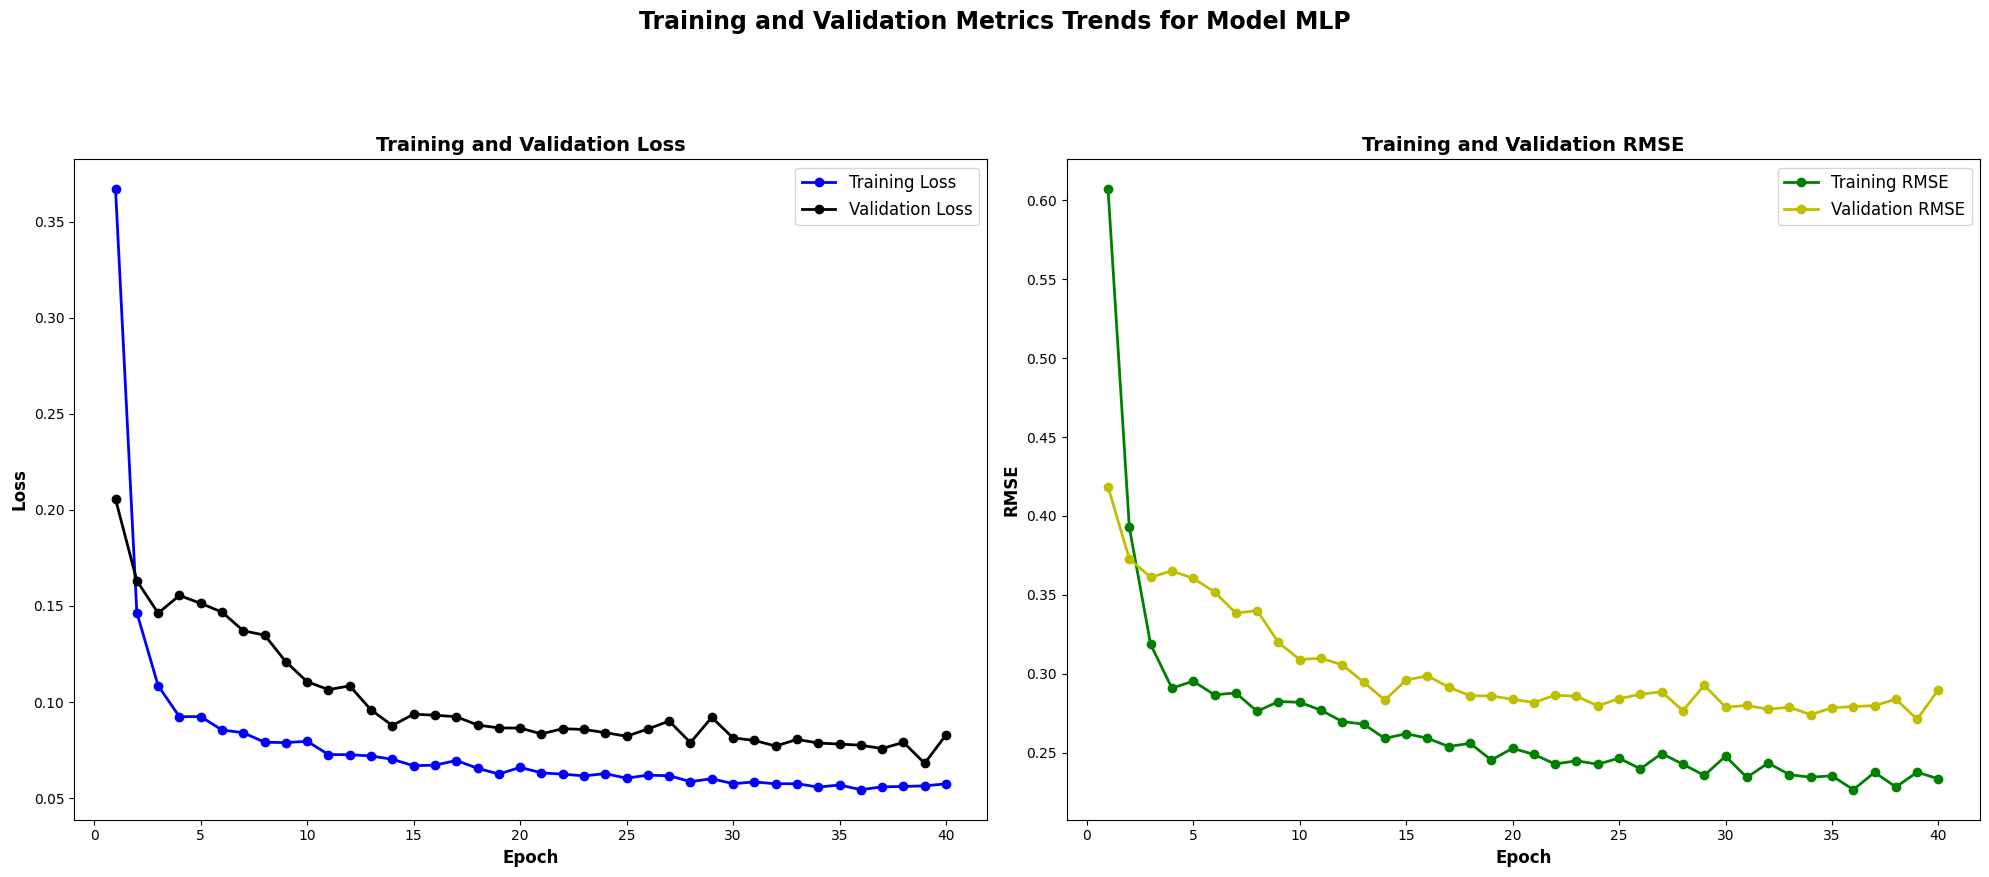

In [61]:
training_history_curves_plot(mlp_metrics, "MLP")

In [62]:
# function to perfom prediction
def predict(model, xtest_tensor):
    model.eval()
    predictions = model(Xtest_tensor).squeeze().cpu().detach().numpy()
    return predictions

mlp_predicted_values = predict(trained_mlp_model, Xtest_tensor)


In [63]:
from sklearn.metrics import mean_absolute_error

def regression_metrics(y_true, y_pred):
    """
    Calculates and returns regression performance metrics as a dictionary.

    Parameters:
    - y_true: Array-like, true target values.
    - y_pred: Array-like, predicted target values.

    Returns:
    - Dictionary with performance metrics: R2, MSE, RMSE, MAE.
    """
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)
    metrics = {
        "R2 Score": r2_score(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": mean_squared_error(y_true, y_pred, squared=False),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred)
    }
    return metrics

In [64]:
def compare_predictions_with_ci(y_true, y_pred, model_name, ci_width=0.1):
    """
    Plots true vs predicted values with confidence intervals and a residual plot.

    Parameters:
    - y_true: Actual values.
    - y_pred: Predicted values.
    - model_name: Name of the model for labeling.
    - ci_width: Fraction of the predicted value range to use as the confidence interval width.
    """
    # inverse transform for logarithmic predictions if needed
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)

    # calculate residuals
    residuals = y_true - y_pred

    # find confidence intervals
    ci_lower = y_pred - ci_width * y_pred
    ci_upper = y_pred + ci_width * y_pred

    # create a df for comparison
    compare_data = pd.DataFrame({
        'Actual': y_true,
        'Predicted': y_pred,
        'Residual': residuals,
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper
    }).reset_index(drop=True)

    plt.figure(figsize=(15, 7))

    # plot 1: True vs Predicted with Confidence Intervals
    plt.subplot(1, 2, 1)
    plt.plot(y_true, label="True Values", alpha=0.7, color='blue')
    plt.plot(y_pred, label="Predicted Values", alpha=0.7, color='orange')
    plt.fill_between(range(len(y_pred)), ci_lower, ci_upper, color='orange', alpha=0.2, label="Confidence Interval")
    plt.title(f"True vs Predicted Values for {model_name}", fontsize=16)
    plt.xlabel("Samples")
    plt.ylabel("Global Active Power")
    plt.legend()

    # plot 2: Residual Plot
    plt.subplot(1, 2, 2)
    plt.scatter(compare_data.index, compare_data['Residual'], alpha=0.7, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residual Plot for {model_name}", fontsize=16)
    plt.xlabel("Samples")
    plt.ylabel("Residuals")

    plt.tight_layout()
    plt.show()

In [65]:

mlp_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),mlp_predicted_values),
    index= ["MLP Model"]
)

mlp_results

,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
MLP Model,-0.292622,0.314599,0.560892,0.418989


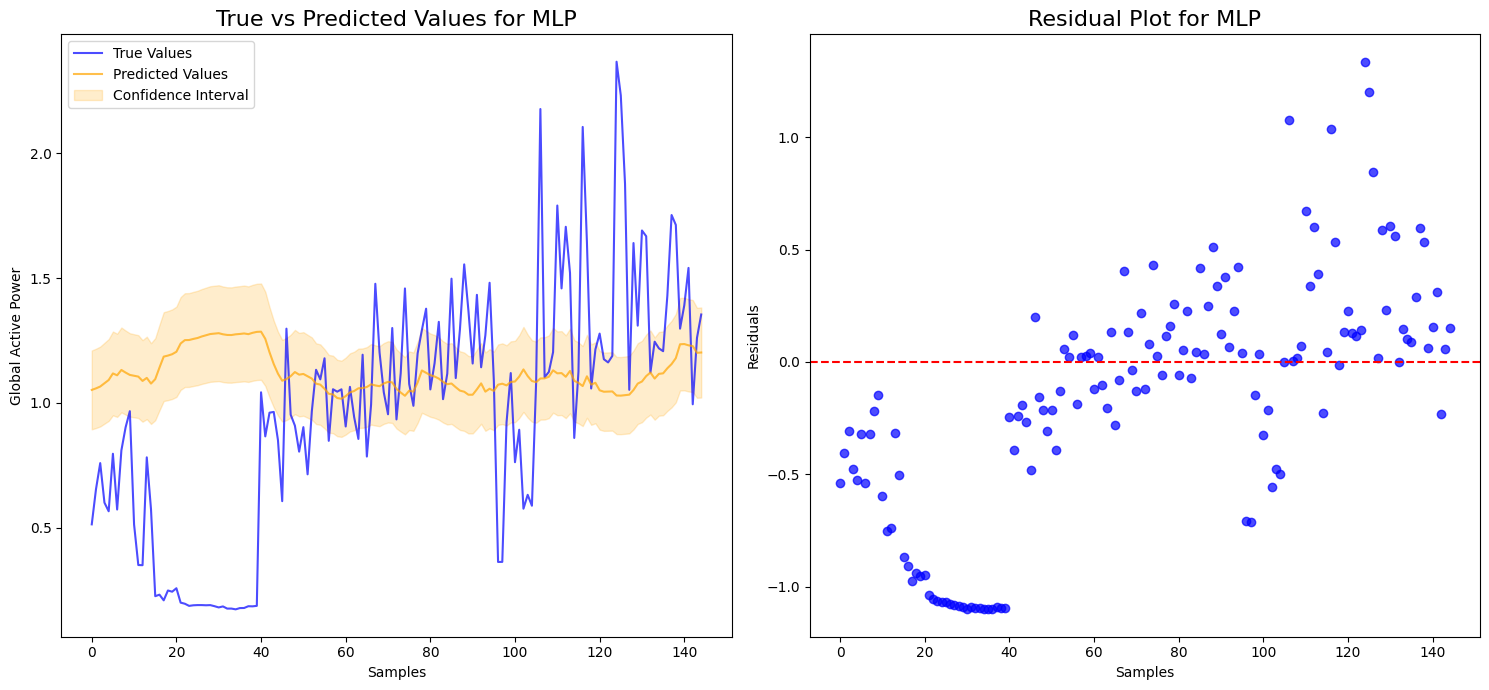

In [66]:
# predictions comparison for MLP model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), mlp_predicted_values, "MLP", ci_width=0.15)


## 2. LSTM model training

In [67]:
# # using LSTM
class CustomLSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(CustomLSTMNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # LSTM layer: Bidirectional
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob, bidirectional=True)

        # adding FC layers
        self.fc1 = nn.Linear(hidden_dim * 2, 128) #its *2 hence BIDERECTIONAL
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

        self.dropout = nn.Dropout(drop_prob)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        # initial  hidden state and cell state
        h0 = torch.zeros(self.n_layers * 2, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.n_layers * 2, x.size(0), self.hidden_dim).to(x.device)

        # forward pass through LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))

        # out = out[:, -1, :]
        out = out.mean(dim=1)  # Mean pooling
        #FC
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out#torch.nn.functional.softplus(out)


In [68]:
# create  the model
lstm_model = CustomLSTMNet(input_dim, hidden_dim, output_dim, n_layers, drop_prob)
lstm_model.to(DEVICE)

CustomLSTMNet(
  (lstm): LSTM(8, 64, num_layers=8, batch_first=True, dropout=0.05, bidirectional=True)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (relu): ReLU()
  (tanh): Tanh()
)

In [69]:
# Train LSTM and evaluate
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=LEARNING_RATE)

lstm_trained_model, lstm_metrics = train_and_evaluate(
    lstm_model, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)

Epoch 1/40 Train Loss: 0.36432 Train rmse: 0.60334  Val Loss 0.08724  val rmse 0.30909
Epoch 2/40 Train Loss: 0.05809 Train rmse: 0.23865  Val Loss 0.08236  val rmse 0.29880
Epoch 3/40 Train Loss: 0.04702 Train rmse: 0.21909  Val Loss 0.07974  val rmse 0.29345
Epoch 4/40 Train Loss: 0.04658 Train rmse: 0.21644  Val Loss 0.07795  val rmse 0.28973
Epoch 5/40 Train Loss: 0.04629 Train rmse: 0.21224  Val Loss 0.07802  val rmse 0.28991
Epoch 6/40 Train Loss: 0.04598 Train rmse: 0.21319  Val Loss 0.07603  val rmse 0.28567
Epoch 7/40 Train Loss: 0.04658 Train rmse: 0.21611  Val Loss 0.07877  val rmse 0.29163
Epoch 8/40 Train Loss: 0.04588 Train rmse: 0.21123  Val Loss 0.07275  val rmse 0.27822
Epoch 9/40 Train Loss: 0.04585 Train rmse: 0.21168  Val Loss 0.07277  val rmse 0.27833
Epoch 10/40 Train Loss: 0.04595 Train rmse: 0.21469  Val Loss 0.07208  val rmse 0.27668
Epoch 11/40 Train Loss: 0.04673 Train rmse: 0.21367  Val Loss 0.07014  val rmse 0.27137
Epoch 12/40 Train Loss: 0.04811 Train rms

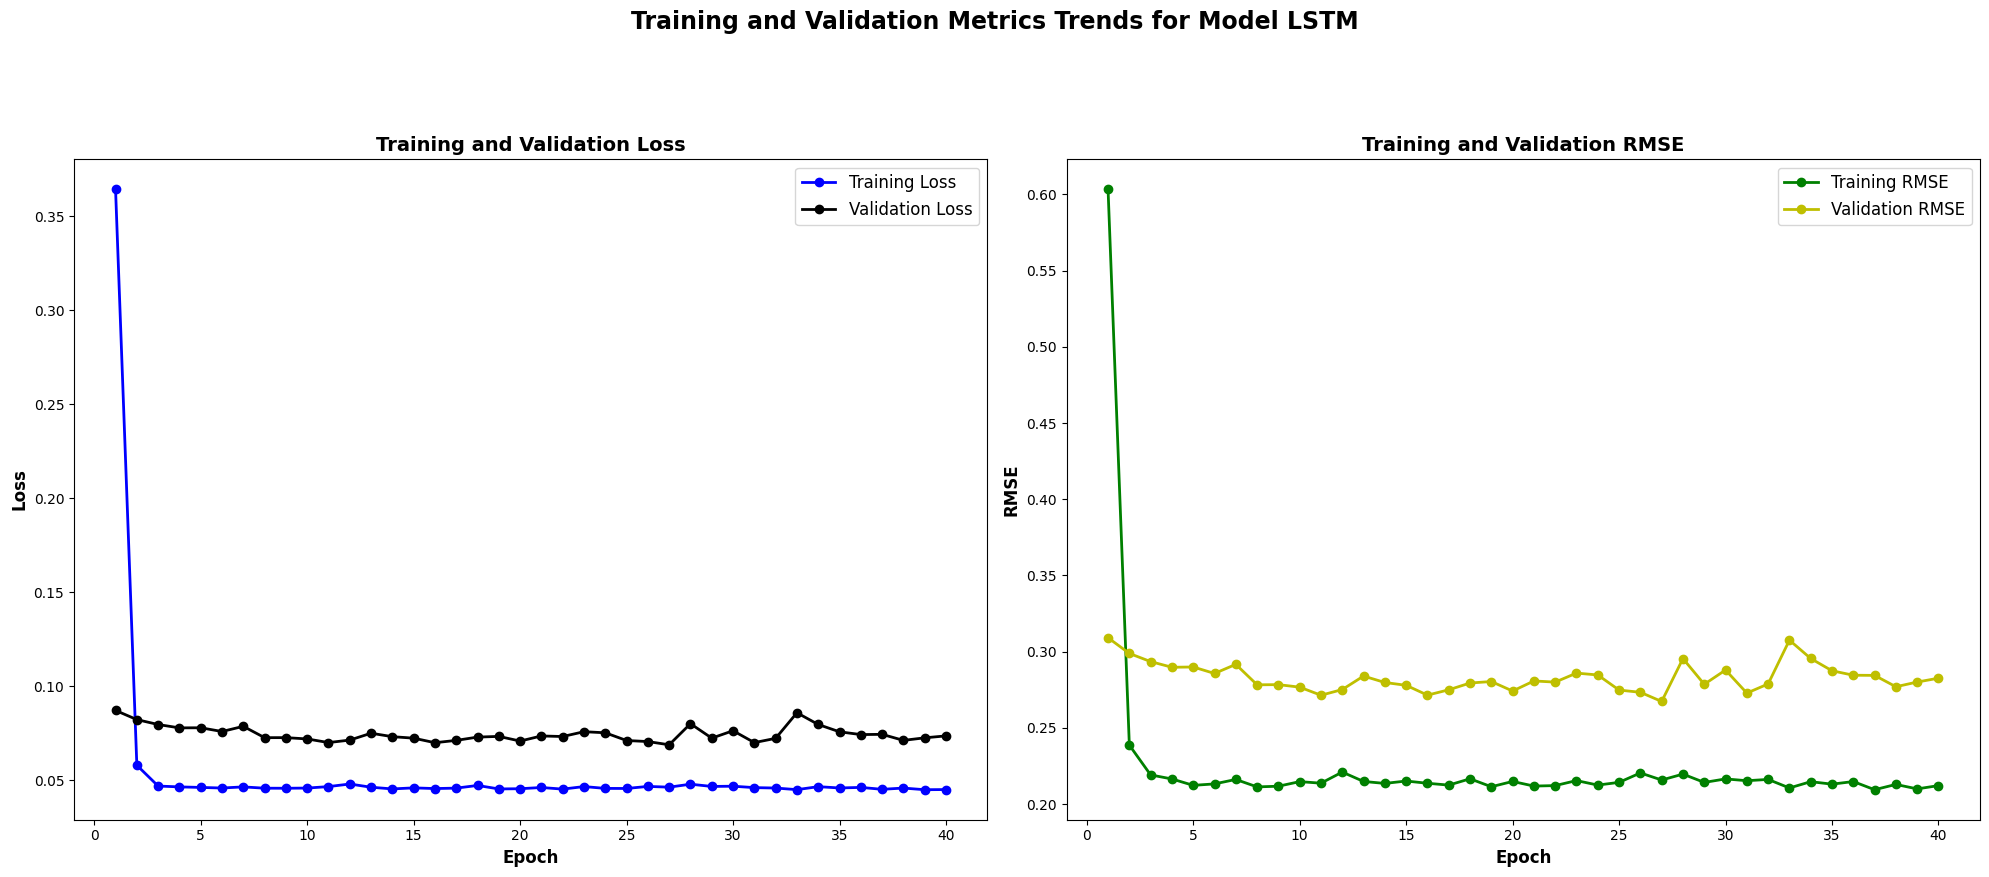

In [70]:
training_history_curves_plot(lstm_metrics, "LSTM")

In [71]:
lstm_predicted_values = predict(lstm_trained_model, Xtest_tensor)


In [72]:

lstm_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),lstm_predicted_values),
    index= ["LSTM Model"]
)

lstm_results


,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
LSTM Model,-0.039103,0.252898,0.50289,0.384107


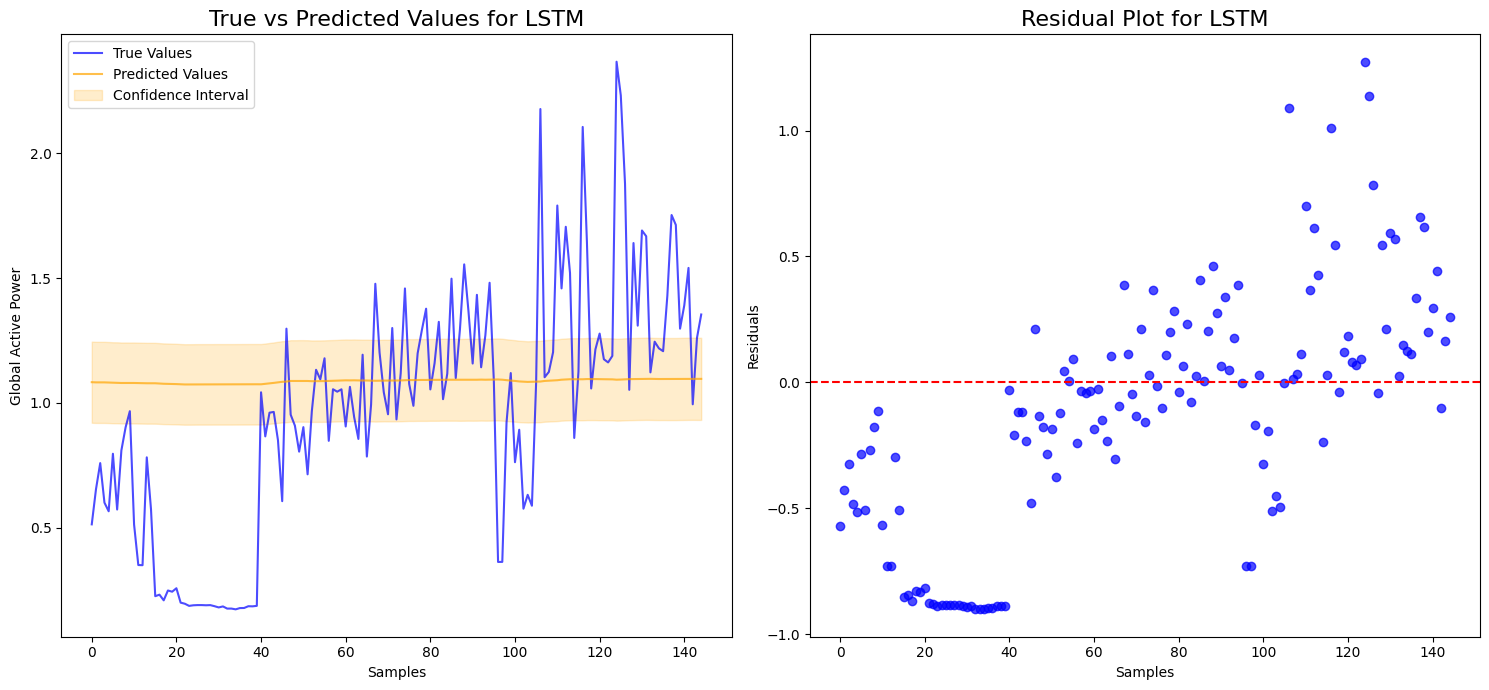

In [73]:
# predictions comparison for LSTM model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), lstm_predicted_values, "LSTM", ci_width=0.15)


## 3. RNN model training

In [74]:
# RNN
class RNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(RNNRegressor, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # RNN layer
        self.rnn = nn.RNN(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob, nonlinearity='tanh')

        # FC layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(x.device)
        out, hn = self.rnn(x, h0)
        out_ = out.mean(dim=1)  # Mean pooling
        out = self.fc(out_)
        return torch.nn.functional.softplus(out)


In [75]:
# RNN model
rnn_model = RNNRegressor(input_dim, hidden_dim, output_dim, n_layers, drop_prob)
rnn_model.to(DEVICE)

RNNRegressor(
  (rnn): RNN(8, 64, num_layers=8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [76]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=LEARNING_RATE)
trained_rnn_model, rnn_metrics = train_and_evaluate(
    rnn_model, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)


Epoch 1/40 Train Loss: 0.04359 Train rmse: 0.20850  Val Loss 0.07536  val rmse 0.28448
Epoch 2/40 Train Loss: 0.04315 Train rmse: 0.20626  Val Loss 0.07925  val rmse 0.29441
Epoch 3/40 Train Loss: 0.04303 Train rmse: 0.20824  Val Loss 0.07307  val rmse 0.27893
Epoch 4/40 Train Loss: 0.04301 Train rmse: 0.20654  Val Loss 0.07426  val rmse 0.28187
Epoch 5/40 Train Loss: 0.04293 Train rmse: 0.20640  Val Loss 0.07583  val rmse 0.28681
Epoch 6/40 Train Loss: 0.04295 Train rmse: 0.20529  Val Loss 0.07209  val rmse 0.27911
Epoch 7/40 Train Loss: 0.04309 Train rmse: 0.20437  Val Loss 0.07640  val rmse 0.28851
Epoch 8/40 Train Loss: 0.04326 Train rmse: 0.20661  Val Loss 0.07428  val rmse 0.28482
Epoch 9/40 Train Loss: 0.04290 Train rmse: 0.20598  Val Loss 0.07264  val rmse 0.28048
Epoch 10/40 Train Loss: 0.04303 Train rmse: 0.20521  Val Loss 0.07645  val rmse 0.28398
Epoch 11/40 Train Loss: 0.04303 Train rmse: 0.20643  Val Loss 0.07456  val rmse 0.28330
Epoch 12/40 Train Loss: 0.04321 Train rms

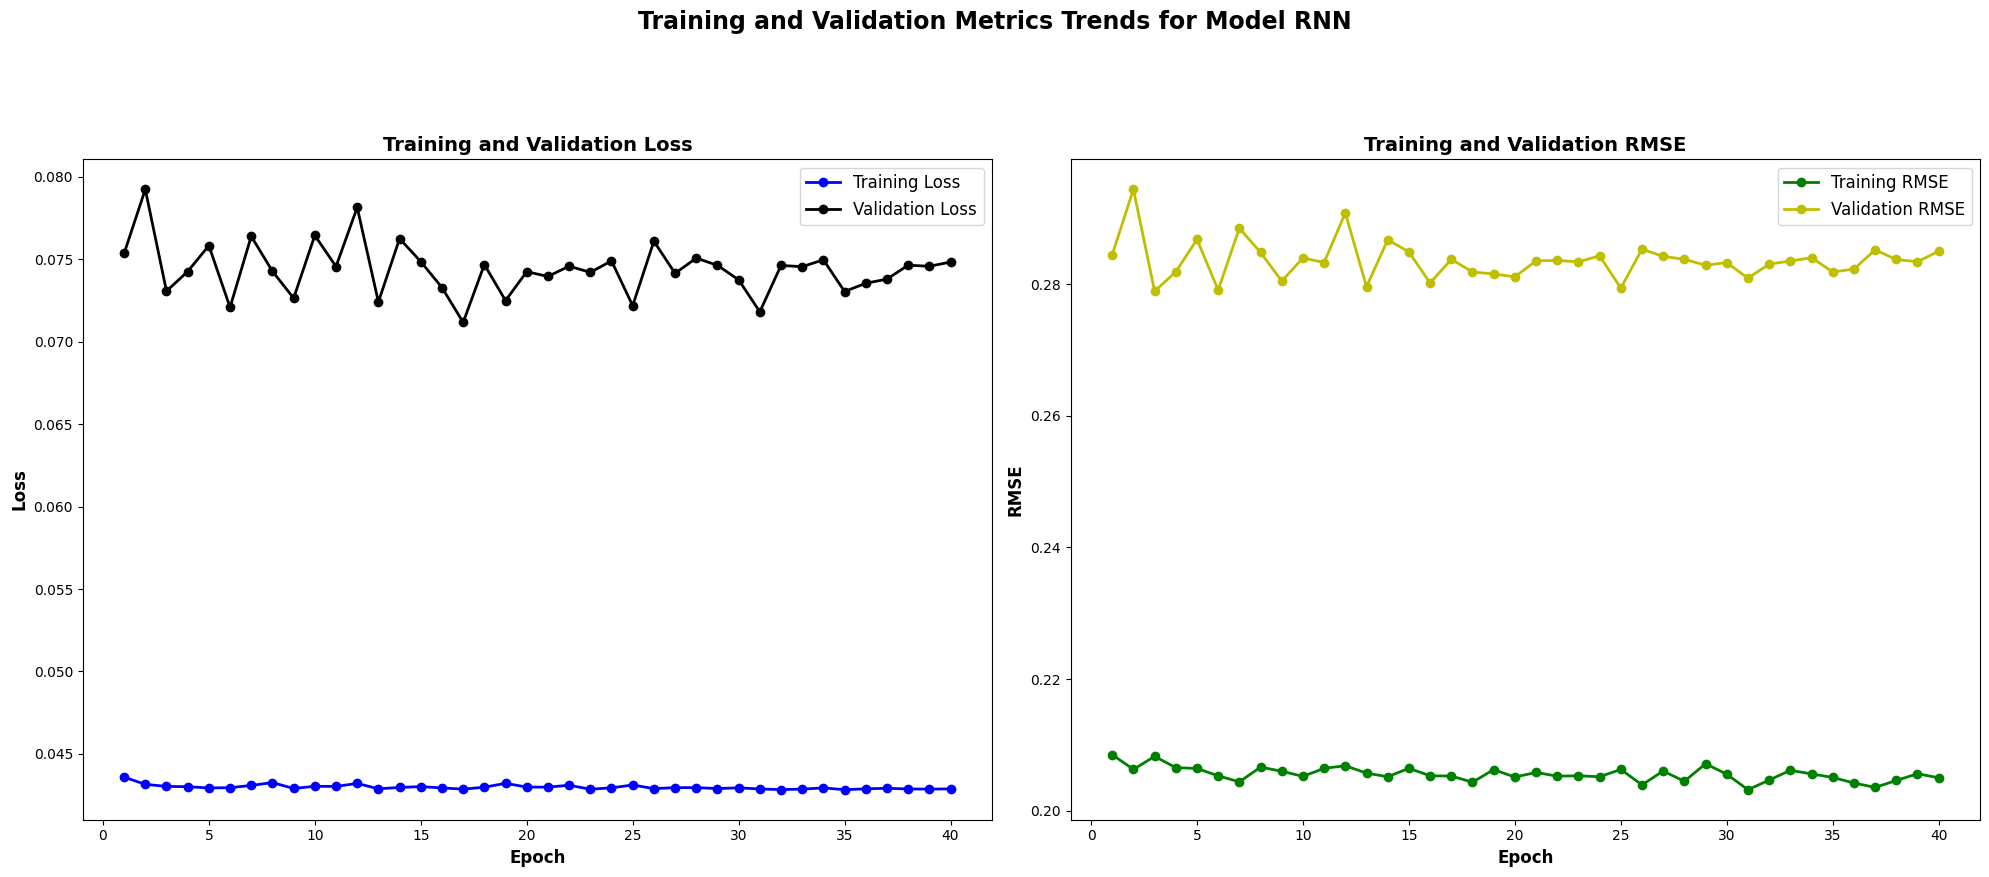

In [77]:
training_history_curves_plot(rnn_metrics, "RNN")